In [1]:
# USO DE IMAGENES SINTÉTICAS

# CLONAR PROYECTO, INCLUYE IMAGENES DE FONDO (TEST02 SIN PELOTA Y COCO COMPRIMIDO)
!git clone https://github.com/mottasilvia/UCU-DeepLearning-Project

fatal: destination path 'UCU-DeepLearning-Project' already exists and is not an empty directory.


In [3]:
!pip install ultralytics==8.0.196
!pip install roboflow

from roboflow import Roboflow

In [24]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [22]:
import os

# DIRECTORIOS DE TRABAJO

synthetic_images_dir = "UCU-DeepLearning-Project/synthetic_images/"
coco_dir = synthetic_images_dir + "background_coco/"
solo_pelota_dir = synthetic_images_dir + "background_test02_sin_pelota/"
solo_pelota_augented_dir = synthetic_images_dir + "background_test02_sin_pelota_augmented/"

overlay_images_v1_dir = synthetic_images_dir + "overlay_images_v1/"
overlay_images_v2_dir = synthetic_images_dir + "overlay_images_v2/"
test02_dir = "/content/datasets/test02/"
training_datasets_dir = "/content/datasets/trainings_datasets/"
training_results_dir = synthetic_images_dir + "trainings_results/"

os.makedirs(training_results_dir, exist_ok=True)
os.makedirs(training_datasets_dir, exist_ok=True)

os.makedirs(solo_pelota_augented_dir, exist_ok=True)

In [16]:
# IMPORTACION DE FUNCIONES
import sys
sys.path.insert(0,synthetic_images_dir)

import functions_annotations
import functions_training
import functions_images
import image_video_loader

In [11]:
# IMPORTACIÓN DE DATASET PARA VALIDACIÓN

rf = Roboflow(api_key="qoRuT4r6jXcLdFGD8Dc6")
project2 = rf.workspace("maestria").project("test02-ta9qb")
version2 = project2.version(3)
dataset2 = version2.download("yolov8", location=test02_dir)


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/test02/ in yolov8:: 100%|██████████| 4546/4546 [00:01<00:00, 2306.36it/s]

/content/datasets/test02/


In [12]:
# DESCOMPRIMIR 1000 IMAGENES DE COCO

import zipfile

def unzip_to_folder(zip_files, target_dir="unzipped_files"):
  os.makedirs(target_dir, exist_ok=True)

  for zip_file in zip_files:
    filename, _ = os.path.splitext(os.path.basename(zip_file))
    folder_name = target_dir
    os.makedirs(folder_name, exist_ok=True)

    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
      zip_ref.extractall(folder_name)

if __name__ == "__main__":
  # Example usage
  zip_files = ["UCU-DeepLearning-Project/synthetic_images/background_coco_01.zip", "UCU-DeepLearning-Project/synthetic_images/background_coco_02.zip", "UCU-DeepLearning-Project/synthetic_images/background_coco_03.zip"]
  unzip_to_folder(zip_files, coco_dir)


In [23]:
# AUGMENTATION DE IMAGENES DE FONDO DE CANCHA SIN PELOTA

functions_images.augment(solo_pelota_dir, solo_pelota_augented_dir, copy_original=True, modifications_number=5, crops_number=5,
                         h_flip_probability=0.5, v_flip_probability=0, resize=(0.8, 1.2), rotation=(-10, 10),
                         blur_range=(0, 7), brightness_range=(0.8, 1.2), contrast_range=(0.9, 1.1),
                         saturation_range=(0.9, 1.1), gray_threshold_range=(0.0, 0.0), origin_labels_folder=None,
                         target_labels_folder=None, crops_min_width=800, crops_max_width=1000)


100%|██████████| 88/88 [01:16<00:00,  1.15it/s]

UCU-DeepLearning-Project/synthetic_images/background_test02_sin_pelota_augmented/
['todo_pelota_mp4-1081_jpg.rf.8d852450cb03add8a18b76aeb838ef29_m0.jpg', 'todo_pelota_mp4-0412_jpg.rf.3cc4b3f6fb326767ea0b9a508b8349a2_m4.jpg', 'todo_pelota_mp4-1139_jpg.rf.a59efcf4a19d3fe9c575b2ddadad6c03_c2.jpg', 'todo_pelota_mp4-1391_jpg.rf.14f0474ac43547901d9dcd4d4c5122b2_c1.jpg', 'todo_pelota_mp4-0574_jpg.rf.3952239921cde36abb21162afa7d3360_m0.jpg', 'todo_pelota_mp4-0524_jpg.rf.7099fd557a627a6a4f8ff73758d545f7_m1.jpg', 'todo_pelota_mp4-1181_jpg.rf.b1d8720794764447a9d70cdb76d8430a_m2.jpg', 'todo_pelota_mp4-1389_jpg.rf.b5f924d1a7f9ed7beeb30fc0d1b39632.jpg', 'todo_pelota_mp4-0577_jpg.rf.395dc1c92e2ac21d8cdfa484d55be83c_m3.jpg', 'todo_pelota_mp4-1418_jpg.rf.626b8bc34ad556e5b2ec2f201210d3c4_c4.jpg', 'todo_pelota_mp4-1048_jpg.rf.8f09adb32181d57b44b0061e341c240a_m3.jpg', 'todo_pelota_mp4-1105_jpg.rf.c6af44e854f6978ce057b4e996c4d0bf_m2.jpg', 'todo_pelota_mp4-0287_jpg.rf.cd55c9697cd9db7d5b36666542830ade_m3.jpg

2024-06-20 01:12:44.057400 CANCHA_v1_1_pelota


UCU-DeepLearning-Project/synthetic_images/overlay_images_v1/: 100%|██████████| 968/968 [00:49<00:00, 19.36it/s]
val: 100%|██████████| 97/97 [00:00<00:00, 12246.33it/s]
New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=../../Yolo-Weights/yolov8s.pt, data=/content/datasets/trainings_datasets/CANCHA_v1_1_pelota/training/data.yaml, epochs=2, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=CANCHA_v1_1_pelota, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0

Result
FN    112
FP     76
TP     39
Name: count, dtype: int64
2024-06-20 01:15:37.618730 CANCHA_v1_5_pelotas


UCU-DeepLearning-Project/synthetic_images/overlay_images_v1/: 100%|██████████| 968/968 [00:50<00:00, 19.29it/s]
val: 100%|██████████| 98/98 [00:00<00:00, 13176.53it/s]
New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=../../Yolo-Weights/yolov8s.pt, data=/content/datasets/trainings_datasets/CANCHA_v1_5_pelotas/training/data.yaml, epochs=2, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=CANCHA_v1_5_pelotas, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou

Result
FN    97
TP    54
FP    39
Name: count, dtype: int64
2024-06-20 01:18:36.596377 CANCHA_v2_1_pelota


UCU-DeepLearning-Project/synthetic_images/overlay_images_v2/: 100%|██████████| 968/968 [00:48<00:00, 19.78it/s]
val: 100%|██████████| 98/98 [00:00<00:00, 14013.43it/s]
New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=../../Yolo-Weights/yolov8s.pt, data=/content/datasets/trainings_datasets/CANCHA_v2_1_pelota/training/data.yaml, epochs=2, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=CANCHA_v2_1_pelota, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0

Result
FP    733
FN    123
TP     28
Name: count, dtype: int64
2024-06-20 01:21:40.321995 CANCHA_v2_5_pelotas


UCU-DeepLearning-Project/synthetic_images/overlay_images_v2/: 100%|██████████| 968/968 [00:51<00:00, 18.89it/s]
val: 100%|██████████| 98/98 [00:00<00:00, 14383.66it/s]
New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=../../Yolo-Weights/yolov8s.pt, data=/content/datasets/trainings_datasets/CANCHA_v2_5_pelotas/training/data.yaml, epochs=2, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=CANCHA_v2_5_pelotas, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou

Result
FP    306
FN     94
TP     57
Name: count, dtype: int64
resultados en UCU-DeepLearning-Project/synthetic_images/trainings_results/


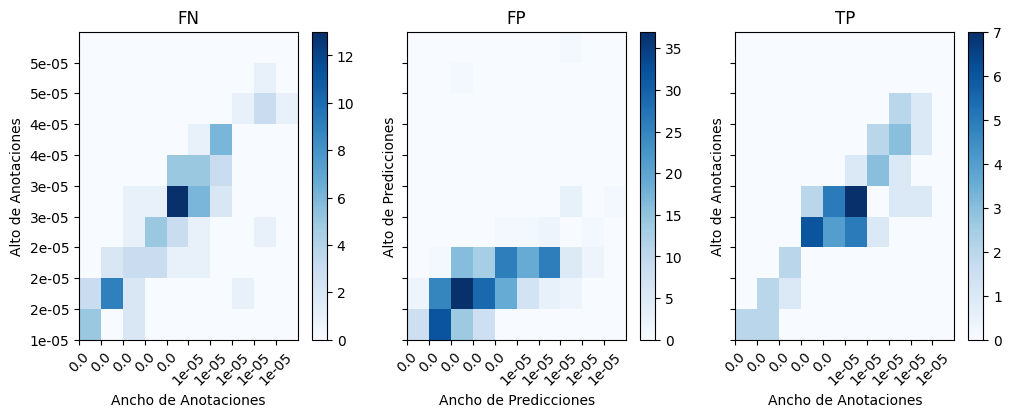

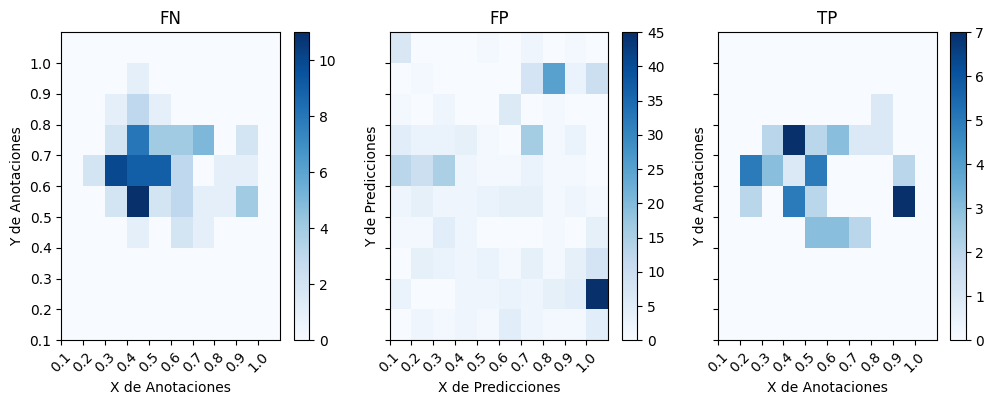

In [32]:
# ENTRENAMIENTO EN LOTE
# RESULTADOS EN training_results_dir


# definir escenarios a entrenar

epochs = 2 # bajo para probar pipeline, usar al menos 15
real_data_yaml_file = test02_dir + "data.yaml"

scenarios_to_train = {}


scenarios_to_train["COCO_v1_1_pelota"] = {
    'input_images_folder': coco_dir,
    'input_overlay_dir': overlay_images_v1_dir,
    'number_of_images_to_overlay': 1,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["COCO_v1_5_pelotas"] = {
    'input_images_folder': coco_dir,
    'input_overlay_dir': overlay_images_v1_dir,
    'number_of_images_to_overlay': 5,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["COCO_v2_1_pelota"] = {
    'input_images_folder': coco_dir,
    'input_overlay_dir': overlay_images_v2_dir,
    'number_of_images_to_overlay': 1,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["COCO_v2_5_pelotas"] = {
    'input_images_folder': coco_dir,
    'input_overlay_dir': overlay_images_v2_dir,
    'number_of_images_to_overlay': 5,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["CANCHA_v1_1_pelota"] = {
    'input_images_folder': solo_pelota_augented_dir,
    'input_overlay_dir': overlay_images_v1_dir,
    'number_of_images_to_overlay': 1,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["CANCHA_v1_5_pelotas"] = {
    'input_images_folder': solo_pelota_augented_dir,
    'input_overlay_dir': overlay_images_v1_dir,
    'number_of_images_to_overlay': 5,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["CANCHA_v2_1_pelota"] = {
    'input_images_folder': solo_pelota_augented_dir,
    'input_overlay_dir': overlay_images_v2_dir,
    'number_of_images_to_overlay': 1,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["CANCHA_v2_5_pelotas"] = {
    'input_images_folder': solo_pelota_augented_dir,
    'input_overlay_dir': overlay_images_v2_dir,
    'number_of_images_to_overlay': 5,
    'epochs': epochs,
    'imgsz': 640
}

functions_training.synthetic_trainings(scenarios_to_train, training_datasets_dir,training_results_dir, real_data_yaml_file=real_data_yaml_file)

print("resultados en " + training_results_dir)